In [1]:
import cv2
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
from brightness_n_sd import make_dict
from func import *

In [2]:
# 각 이미지의 밝기평균, 표준편차 계산
average, sd = make_dict()

In [132]:
# 구간 나누기
# (0,255) 몇 구간으로 나눌지 
N = 4        #4, 8, 32, ..

filtered_dark = {key: value for key, value in dict(average).items() if value <= 256/N}
filtered_bright = {key: value for key, value in dict(average).items() if value >= 256-256/N}

In [133]:
# N개로 나눈 구간에서 1번째 구간(어두운 이미지)), N번째 구간(밝은 이미지)에 속하는 개수
print("어두운 이미지 개수 :", len(filtered_dark))
print("밝은 이미지 개수 :",len(filtered_bright))

어두운 이미지 개수 : 290
밝은 이미지 개수 : 59


In [134]:
# for item in filtered_bright:
#     histo(item)

### 결과 json 파일 가져오기

In [135]:
import json

# JSON 파일 경로
json_file_path = 'result_keypoints_small_base.json'

# JSON 파일 읽기
with open(json_file_path, 'r') as f:
    data = json.load(f)

print(f'개수: {len(data)}')

개수: 73304


In [136]:
# val data 전체에 대한 score 불러오기
entire_score = find_id_list(dict(average), data)
# None 값 빼고 저장
# entire_score_Not_None = {key: value for key, value in entire_score.items() if value is not None}
entire_score_Not_None = {key: value for key, value in entire_score.items() if value is not None and value != 0}

In [137]:
print("val data 전체에 대한 score 평균 :", round(np.mean(list(entire_score_Not_None.values())),4))

val data 전체에 대한 score 평균 : 0.546


Not None => val data 전체에 대한 score 평균 : 0.5379

Not None & Not 0 => val data 전체에 대한 score 평균 : 0.546

In [138]:
# val 이미지에 대한 score 저장
val_score_totalID = find_id_list(dict(average), data)

In [139]:
# None값 아닌거만 저장
# val_score_before = {key: value for key, value in val_score_totalID.items() if value is not None}
# Not None & Not zero
val_score_before = {key: value for key, value in val_score_totalID.items() if value is not None and value != 0}

In [140]:
len(val_score_before)

3835

In [141]:
# score가 0인 이미지 확인
zero_value_items = {key: value for key, value in val_score_before.items() if value == 0}

if zero_value_items:
    print(f"The items with value 0: {zero_value_items}")
else:
    print("No items with value 0 found.")

No items with value 0 found.


In [142]:
# # 이미지 보기
# image_name = 110999
# path = f"val2017/{image_name:012d}.jpg"
# ex = cv2.imread(path)
# ex = cv2.cvtColor(ex, cv2.COLOR_BGR2GRAY) 

# plt.imshow(ex, cmap='gray')
# plt.axis(False)
# plt.show()

In [143]:
# 밝은 이미지/ 어두운 이미지에 대한 score 저장 
bright_score_totalID = find_id_list(filtered_bright, data)
dark_score_totalID = find_id_list(filtered_dark, data)

In [144]:
# @ json파일에 특정 image_id score가 존재하는지 여부 검색 함수
find_id(477805, data)

Score for image_id 477805: 0.6265679930513542


In [145]:
# none값 아닌 거만 저장
# bright_score_before = {key: value for key, value in bright_score_totalID.items() if value is not None}
# dark_score_before = {key: value for key, value in dark_score_totalID.items() if value is not None}
bright_score_before = {key: value for key, value in bright_score_totalID.items() if value is not None and value !=0}
dark_score_before = {key: value for key, value in dark_score_totalID.items() if value is not None and value !=0}

In [146]:
print("개수:", len(bright_score_before))
print("개수:", len(dark_score_before))

개수: 46
개수: 239


In [147]:
print("밝은 이미지 :", round(np.mean(list(bright_score_before.values())), 4))
print("어두운 이미지 :", round(np.mean(list(dark_score_before.values())),4))

밝은 이미지 : 0.6365
어두운 이미지 : 0.5253


Not None => 밝은 이미지 : 0.637
어두운 이미지 : 0.515

Not None & Not 0 => 밝은 이미지 : 0.637
어두운 이미지 : 0.525

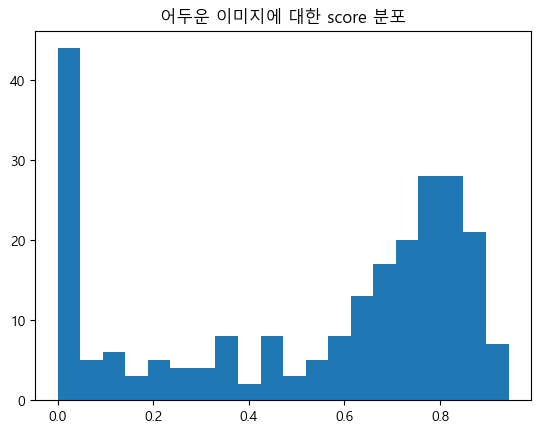

In [148]:
plt.hist(list(dark_score_before.values()), bins=20)
plt.title("어두운 이미지에 대한 score 분포")
plt.show()

In [149]:
# 이미지별로 avg, sd, score 저장

image_table = {}

for item in dict(average): # options : dict(average)-val_score_before / bright_score_before / dark_score_before
    image_name = int(item.replace("val2017/", "").replace(".jpg", ""))
    if image_name in val_score_before:
        img = cv2.imread(item)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

        if img is not None:
            img_sd = round(np.std(img),3)
            img_avg = round(np.mean(img),3)
            # img_sd = np.std(img)
            # img_avg = np.mean(img)
            # image_table[item] = [img_avg, img_sd, round(val_score_before[image_name],3)]
            image_table[item] = [img_avg, img_sd, val_score_before[image_name]]
            

In [150]:
# score 값 0 있나 확인
tmp = pd.DataFrame(list(image_table.values()))
tmp[tmp.loc[:,2]==0]

,0,1,2


In [151]:
# 밝은 이미지 
# 이미지별로 avg, sd, score 저장

bright_image_table = {}

for item in dict(filtered_bright): # options : dict(average)-val_score_before / bright_score_before / dark_score_before
    image_name = int(item.replace("val2017/", "").replace(".jpg", ""))
    if image_name in val_score_before:
        img = cv2.imread(item)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

        if img is not None:
            img_sd = round(np.std(img),3)
            img_avg = round(np.mean(img),3)
            bright_image_table[item] = [img_avg, img_sd, val_score_before[image_name]]

In [152]:
# 어두운 이미지
# 이미지별로 avg, sd, score 저장

dark_image_table = {}

for item in dict(filtered_dark): # options : dict(average)-val_score_before / bright_score_before / dark_score_before
    image_name = int(item.replace("val2017/", "").replace(".jpg", ""))
    if image_name in val_score_before:
        img = cv2.imread(item)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

        if img is not None:
            img_sd = round(np.std(img),3)
            img_avg = round(np.mean(img),3)
            dark_image_table[item] = [img_avg, img_sd, val_score_before[image_name]]

In [153]:
image_table # avg, sd, score

{'val2017/000000477805.jpg': [3.173, 15.514, 0.6265679930513542],
 'val2017/000000155051.jpg': [9.348, 25.036, 0.000874216104069638],
 'val2017/000000200152.jpg': [19.952, 41.803, 0.0005219528494575084],
 'val2017/000000110999.jpg': [25.04, 29.62, 0.1180935892194224],
 'val2017/000000258388.jpg': [23.644, 32.545, 0.8639818486186495],
 'val2017/000000232684.jpg': [23.021, 65.35, 0.6160191101338981],
 'val2017/000000255749.jpg': [23.083, 42.693, 0.8421902147896055],
 'val2017/000000187236.jpg': [25.222, 24.633, 0.6702216648300503],
 'val2017/000000035062.jpg': [25.518, 38.208, 0.3656205142819182],
 'val2017/000000185473.jpg': [31.798, 44.546, 0.7258808687037184],
 'val2017/000000545219.jpg': [27.164, 32.382, 0.845210755976763],
 'val2017/000000167122.jpg': [31.148, 31.664, 0.0052849116252690065],
 'val2017/000000018770.jpg': [31.148, 37.618, 0.5391747234028207],
 'val2017/000000178982.jpg': [32.198, 38.638, 0.668673691583704],
 'val2017/000000079837.jpg': [31.11, 18.233, 0.19888471727977

In [154]:
val_df = pd.DataFrame.from_dict(image_table, orient='index', columns=['average', 'sd', 'score'])
bright_df = pd.DataFrame.from_dict(bright_image_table, orient='index', columns=['average', 'sd', 'score'])
dark_df = pd.DataFrame.from_dict(dark_image_table, orient='index', columns=['average', 'sd', 'score'])
# df.head(5)
# df.to_csv("img_summary_table.csv")

In [155]:
# score로 sorting
val_df = val_df.sort_values(by='score', ascending=True)
bright_df = bright_df.sort_values(by='score', ascending=True)
dark_df = dark_df.sort_values(by='score', ascending=True)

val_df

,average,sd,score
val2017/000000284282.jpg,115.704,53.849,0.000120
val2017/000000234807.jpg,60.411,28.935,0.000178
val2017/000000460229.jpg,109.571,62.175,0.000182
val2017/000000180798.jpg,117.189,47.682,0.000192
val2017/000000374727.jpg,122.929,77.615,0.000208
...,...,...,...
val2017/000000356505.jpg,170.022,50.446,0.942072
val2017/000000430961.jpg,102.794,62.391,0.942484
val2017/000000025393.jpg,40.868,42.120,0.943251
val2017/000000127270.jpg,138.607,53.132,0.961550


In [156]:
val_df[val_df.score == 0]

,average,sd,score
